# Map of hospitals in Victoria using Python

Python's 
Folium is built on top of python and leaflet.js.
In this post we will visualize all the hospitals in Victoria using folium.

## Purpose of this post:
- Mark all the hospitals in victoria using folium marker
- Which localities have the highest number of hospitals? - barplot 
- Visualizing localities with highest number of hospitals in map using folium Circle.


## Data Reference:
1. Hospital locations by vic.gov.in - [here](https://discover.data.vic.gov.au/dataset/hospital-locations-spatial) .
2. Postcode details provided by  Matthew Procter - [here](https://www.matthewproctor.com/australian_postcodes) .


## Step 1 : Import dependencies

In [215]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Load the data
Hospital location data is provided by vic.gov.au [here](https://discover.data.vic.gov.au/dataset/hospital-locations-spatial)

In [216]:
data = pd.read_csv('./data/hospital_locations.csv')
data.head()


X          Y  FID                                    LabelName  \
0  144.983399 -37.809681    1       East Melbourne Specialist Day Hospital   
1  145.149300 -37.951400    2                   Windsor Avenue Day Surgery   
2  145.344653 -38.034580    3       Hyperbaric Health Wound Centre Berwick   
3  143.832286 -37.540553    4                Ballarat Day Procedure Centre   
4  145.143379 -38.148189    5  Bayside Day Procedure and Specialist Centre   

                         OpsName     Type  StreetNum    RoadName RoadType  \
0    EAST MELBOURNE DAY HOSPITAL  PRIVATE         23   CLARENDON   STREET   
1     WINDSOR AVENUE DAY SURGERY  PRIVATE         17     WINDSOR   AVENUE   
2    HYPERBARIC HEALTH - BERWICK  PRIVATE          3        GIBB   STREET   
3  BALLARAT DAY PROCEDURE CENTRE  PRIVATE  1117-1123      HOWITT   STREET   
4   BAYSIDE DAY PROCEDURE CENTRE  PRIVATE        141  CRANBOURNE     ROAD   

  RoadSuffix  CampusCode            LGAName LocalityNa  Postcode VicgovRegi  \
0                   8280          MELBOURNE                 3002       NWMR   
1                   7050  GREATER DANDENONG                 3171        SMR   
2                   7100              CASEY                 3806        SMR   
3                   8430           BALLARAT                 3355       Gram   
4                   7310          FRANKSTON                 3199        SMR   

  State ServiceNam  
0   VIC             
1   VIC             
2   VIC             
3   VIC             
4   VIC

## Step 3 : Some details about the data 

What are the number of public and private hospitals in victoria?

In [220]:
print("Number of public hospitals in victoria :" ,len(data[data["Type"] == "PUBLIC"]))
print("Number of private hospitals in victoria :" ,len(data[data["Type"] == "PRIVATE"]))

Number of public hospitals in victoria : 150
Number of private hospitals in victoria : 175


Fields in the data:

In [221]:
data.columns

Index(['X', 'Y', 'FID', 'LabelName', 'OpsName', 'Type', 'StreetNum',
       'RoadName', 'RoadType', 'RoadSuffix', 'CampusCode', 'LGAName',
       'LocalityNa', 'Postcode', 'VicgovRegi', 'State', 'ServiceNam'],
      dtype='object')

We do not require all the fields in the data, so let us **filter** it

In [218]:
df = data.filter(["Y","X","LabelName","Type","StreetNum","RoadName","RoadType","Postcode"])
df.head()

Y           X                                    LabelName  \
0 -37.809681  144.983399       East Melbourne Specialist Day Hospital   
1 -37.951400  145.149300                   Windsor Avenue Day Surgery   
2 -38.034580  145.344653       Hyperbaric Health Wound Centre Berwick   
3 -37.540553  143.832286                Ballarat Day Procedure Centre   
4 -38.148189  145.143379  Bayside Day Procedure and Specialist Centre   

      Type  StreetNum    RoadName RoadType  Postcode  
0  PRIVATE         23   CLARENDON   STREET      3002  
1  PRIVATE         17     WINDSOR   AVENUE      3171  
2  PRIVATE          3        GIBB   STREET      3806  
3  PRIVATE  1117-1123      HOWITT   STREET      3355  
4  PRIVATE        141  CRANBOURNE     ROAD      3199

# Step 4:  Mark all the hospitals in Victoria using folium Marker

We will use folium marker to mark all (325) the hospitals in Victoria.

In [378]:
#Create a map
m = folium.Map(location=[-37.0,144], control_scale=True, zoom_start=7,attr = "text some")
df_copy = df.copy()
#df_copy['count'] = 1

# loop through data to create Marker for each hospital
for i in range(0,len(df_copy)):
    
    # html to be displayed in the popup 
    html="""
    <h4> Hospital name: </h4>""" + str(df_copy.iloc[i]['LabelName'])+ \
    """<h4>Type:</h4>""" + str(df_copy.iloc[i]['Type']) +" Hospital" +\
    """<h4>Address:</h4>""" + str(df_copy.iloc[i]['StreetNum'])+" "+ str(df_copy.iloc[i]['RoadName'])+" "+ str(df_copy.iloc[i]['RoadType'])
    
    #IFrame 
    iframe = folium.IFrame(html=html, width=200, height=300)
    popup = folium.Popup(iframe, max_width=2650)
    
    #If you do not want html in popup this would be the alternative code ->
    #popup = html("<b>HOSPITAL NAME:</b> "+str(df_copy.iloc[i]['LabelName'])+"<br/><br/><b>TYPE:</b> "+str(df_copy.iloc[i]['Type']) +" hospital"\
   # +"<br/><br/> <b>ADDRESS:</B> " + str(df_copy.iloc[i]['StreetNum'])+" "+ str(df_copy.iloc[i]['RoadName'])+" "+ str(df_copy.iloc[i]['RoadType'])),
    
    folium.Marker(
    location=[df_copy.iloc[i]['Y'], df_copy.iloc[i]['X']],
    popup=popup,
    tooltip=str(df_copy.iloc[i]['LabelName']),
    icon=folium.Icon(color='green',icon='medkit',prefix="fa"),
    ).add_to(m)
        
m.save("./files/hospitals.html")
m


- Custom icons can also be created using folium.features.CustomIcon
- in the datafram, Y is latitude and X is longitude
- IFrame is a way you can use html in a popup since popup doesn't have html facility by default

folium.Marker arguments - 
- tooltip - adds hover functionality
- popup - string to be displayed when clicked upon the marker.
- icon - icon can be selected from font awesome, just mention the prefix 'fa'.


## Step 4: Postcodes with highest number of hospitals`
Let us visualize postcodes/su

In [186]:
df_c[df_c["Postcode"] == 3806]
df_postcode = df_c.groupby(['Postcode'],as_index=False)
postcode_count = df_postcode.count().filter(["Postcode","FID"])
postcode_count = postcode_count.sort_values(by="FID",ascending=False)


## Step 5: Merge this with postocode details
- The original dataframe does not contain postcode details such as locality name, latitude and longitude based on a given postcode.
- Postcode details are obtained from [here](https://www.matthewproctor.com/australian_postcodes) by Matthew Procter.
- both the dataframes are merged based on the common key - postcode.

In [187]:
australian_postcodes = pd.read_csv('./data/australian_postcodes.csv')
vic_postcodes = australian_postcodes[australian_postcodes["state"]=='VIC']
vic_postcodes = vic_postcodes.filter(["postcode","locality","lat",'long'])
vic_postcodes.head(5)

postcode        locality        lat        long
6007      3000       MELBOURNE -37.817403  144.956776
6008      3001       MELBOURNE   0.000000    0.000000
6009      3002  EAST MELBOURNE -37.818517  144.982207
6010      3003  WEST MELBOURNE -37.810871  144.949592
6011      3004       MELBOURNE -37.844246  144.970161

In [275]:
df_merged  = postcode_count.merge(vic_postcodes,left_on='Postcode',right_on='postcode',how="inner")
df_merged = df_merged.dropna()
top_localities = df_merged.sort_values(by="FID",ascending=False)
top_localities


Postcode  FID  postcode        locality         lat        long
0         3002   10      3002  EAST MELBOURNE  -37.818517  144.982207
2         3011    8      3011          SEDDON  -37.807101  144.907953
3         3011    8      3011     SEDDON WEST  -37.807101  144.907953
1         3011    8      3011       FOOTSCRAY  -37.807101  144.907953
4         3199    7      3199       FRANKSTON  -38.162578  145.135961
...        ...  ...       ...             ...         ...         ...
589       3898    1      3898     OMEO VALLEY  147.615721  147.615721
588       3898    1      3898            OMEO  -37.066169  147.464799
587       3898    1      3898     HINNOMUNJIE  -37.066169  147.464799
586       3898    1      3898      GLEN WILLS  -37.066169  147.464799
1363      3995    1      3995        WOOLAMAI  -38.578071  145.630713

[1364 rows x 6 columns]

## Localities with most hospitals

- note: There can be more than one locality under a single postcode.
- We will find out which localities have the highest number of hospitals

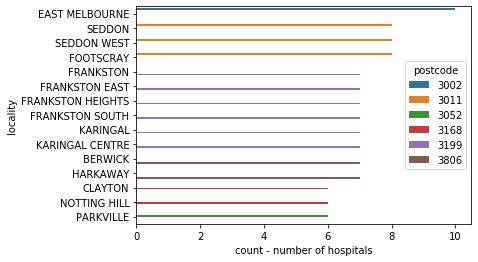

In [227]:
top_localities_15 = top_localities.head(15)
ax = sns.barplot(top_localities_15['FID'],top_localities_15['locality'],hue=top_localities_15['postcode'])
ax.set(xlabel="count - number of hospitals",ylabel="locality")
ax

## create map of number of hospitals in a locality
- We will use folium circle to create this map.
- the size of circle represents the number of hospitals in the locality.

In [376]:
from folium.plugins import HeatMap
from folium.features import CustomIcon
m = folium.Map(location=[-38.0,145], control_scale=True, zoom_start=10,attr = "text some")
df_copy = df_merged.copy()
df_copy['count'] = 1

# create Folium circle
for i in range(0,len(df_copy)):
     # html to be displayed in the popup 
    html="""
    <h4> Locality Name: </h4>""" + str(df_copy.iloc[i]['locality'])+\
    """<h4>Postcode:</h4>""" + str(df_copy.iloc[i]['postcode'])+\
    """<h4>Number of hospitals:</h4>""" + str(df_copy.iloc[i]['FID'])
    
    #IFrame 
    iframe = folium.IFrame(html=html, width=200, height=300)
    popup = folium.Popup(iframe, max_width=2650)
    
    folium.Circle(
    location=[df_copy.iloc[i]['lat'], df_copy.iloc[i]['long']],
    radius=float(df_copy.iloc[i]['FID']*200),
    popup=popup,
    tooltip=str(df_copy.iloc[i]['locality']),
    color='crimson',
     fill=True,
     fill_color='green'
    ).add_to(m)
        
m.save("./files/locality.html")


#m.save("highest_hospitals_postcode.html")
m

In [268]:
Disclaimer :
- This hospitals may not fall under the circle,the size of circle is a representation of number of hospitals in a locality. for accurate location of the hospital see map 1
- for accurate location of the hospital look at map 1

SyntaxError: invalid syntax (<ipython-input-268-931839038846>, line 1)

Combining this with the heatmap


In [248]:
HeatMap(data=df_copy[['lat', 'long', 'count']].groupby(['lat', 'long']).sum().reset_index().values.tolist(),gradient={0.2: 'blue', 0.4: 'lime', 0.6: 'orange', 1: 'red'},radius=15, max_zoom=13).add_to(m)
m

In [ ]:
We can combine all the three features, i.e hospitals, locality and the heatmap in a single map using Featuregroup and control layer.
If you want to check out the code for combined map visit my github repository [here]() and open app.ipyn

## app

In [400]:

from folium.plugins import HeatMap
from folium.features import CustomIcon
m = folium.Map(location=[-38.0,145], control_scale=True, zoom_start=10,attr = "text some",tiles=None)
df_copy = df.copy()
df_copy['count'] = 1

feature_group0 = folium.FeatureGroup(name='Hospitals',overlay=False).add_to(m)
feature_group1= folium.FeatureGroup(name='Locality',overlay=False).add_to(m)
feature_group2 = folium.FeatureGroup(name='HeatMap of hospitals',overlay=False).add_to(m)

for i in range(0,len(df_copy)):
    html="""
    <h4> Hospital name: </h4>""" + str(df_copy.iloc[i]['LabelName'])+ \
    """<h4>Type:</h4>""" + str(df_copy.iloc[i]['Type']) +" Hospital" +\
    """<h4>Address:</h4>""" + str(df_copy.iloc[i]['StreetNum'])+" "+ str(df_copy.iloc[i]['RoadName'])+" "+ str(df_copy.iloc[i]['RoadType'])
    
    #IFrame 
    iframe = folium.IFrame(html=html, width=200, height=300)
    popup = folium.Popup(iframe, max_width=2650)
    
    folium.Marker(
    location=[df_copy.iloc[i]['Y'], df_copy.iloc[i]['X']],
    radius=float(3),
    popup=popup,
    tooltip=str(df_copy.iloc[i]['LabelName']),
    icon=folium.Icon(color='green',icon='medkit',prefix="fa"),
    legend_name ="hospitals"
    ).add_to(feature_group0)

    

    
df_merg = df_merged.copy()
df_merg['count'] = 1

# create Folium circle
for i in range(0,len(df_merg)):
    # html to be displayed in the popup 
    html="""
    <h4> Locality Name: </h4>""" + str(df_merg.iloc[i]['locality'])+\
    """<h4>Postcode:</h4>""" + str(df_merg.iloc[i]['postcode'])+\
    """<h4>Number of hospitals:</h4>""" + str(df_merg.iloc[i]['FID'])
    
    #IFrame 
    iframe = folium.IFrame(html=html, width=200, height=300)
    popup = folium.Popup(iframe, max_width=2650)
    
    folium.Circle(
    location=[df_merg.iloc[i]['lat'], df_merg.iloc[i]['long']],
    radius=float(df_merg.iloc[i]['FID']*200),
    popup=popup,
    tooltip=str(df_merg.iloc[i]['locality']),
    color='crimson',
     fill=True,
     fill_color='green'
    ).add_to(feature_group1)

HeatMap(data=df_copy[['Y', 'X', 'count']].groupby(['Y', 'X']).sum().reset_index().values.tolist(),gradient={0.2: 'blue', 0.4: 'lime', 0.6: 'orange', 1: 'red'},radius=15, max_zoom=13).add_to(feature_group2)

folium.TileLayer('OpenStreetMap',overlay=True,name="color mode").add_to(m)     
folium.TileLayer('cartodbdark_matter',overlay=True,name="dark mode").add_to(m)
folium.LayerControl(collapsed=False).add_to(m)

m.save("./files/combined.html")


m
